---
# Dataset distributions
---

### Imports

In [4]:
from datetime import datetime
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Option to display all columns of dataframe:
pd.set_option("display.max_columns", None)

### Visualization functions

In [5]:
def plot_pie(items, labels, legend, title):
    """
    param items: items to be displayed
    param labels: labels for items to be displayed
    param title: Figure title text 
    """
    plt.figure(figsize=(6,6))
    plt.pie(x=items,
            labels=labels,
            autopct='%1.2f%%',
            textprops={'fontsize':14},
            explode = [0.01 for i in items],
            colors=sns.color_palette('Set2'))
    plt.title(label=title, 
              fontdict={"fontsize":16},
              pad=20)
    plt.legend(legend, loc="upper right")
    plt.show()
    
    
def plot_val_counts_bar(df, col, x_lbl, y_lbl, title):
    """
    Plot value counts of specific column of the dataframe
    :param df: dataframe 
    :param col: column name
    :param x_lbl: x label name
    :param y_lbl: y label name
    :param title: figure title
    """
    sns.set(rc = {'figure.figsize':(8,4)})
    sns.set_theme(style="whitegrid")
    ax = sns.countplot(data=df, x=col, order=df[f'{col}'].value_counts().index)
    ax.set_title(title, fontsize=18, pad=20, fontweight='bold')
    ax.set_xlabel(x_lbl, fontsize=15, color='black', labelpad=20)
    ax.set_ylabel(y_lbl, fontsize=15, color='black', labelpad=20)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()
    
    
def calculate_age(df: pd.DataFrame):
    ### calculate age helper
    df['Fødselsdato'] = pd.to_datetime(df['Fødselsdato'])
    df["Alder"] = df['Fødselsdato'].apply(lambda x : (datetime.now().year - x.year))

In [6]:
# load data from csv:
df = pd.read_csv("../data/poc_data.csv", sep=";", low_memory=False)

In [7]:
calculate_age(df=df)

In [8]:
# Get unique Person ID's from the dataset
pids = df['PERSON ID'].unique()

# group employees based on PID number
grouped_by_pid = [df[df['PERSON ID'] == pid] for pid in pids]

# Split employees into the groups:
active = []
active_dataset = []
terminated = []
terminated_dataset = []
rehired = []
rehired_dataset = []

for group in grouped_by_pid:
    if group['Sluttdato'].isnull().all():
        active.append(group.iloc[-1])
        active_dataset.append(group)
    elif group['Sluttdato'].notnull().any():
        terminated.append(group.iloc[-1])
        terminated_dataset.append(group)
    else:
        rehired.append(group.iloc[-1])
        rehired_dataset.append(group)

In [9]:
# create dataframe objects:
active = pd.DataFrame(active)
active_dataset = pd.concat(active_dataset)
terminated = pd.DataFrame(terminated)
terminated_dataset = pd.concat(terminated_dataset)
rehired_dataset = pd.concat(rehired) if rehired else None

## Employees distribution

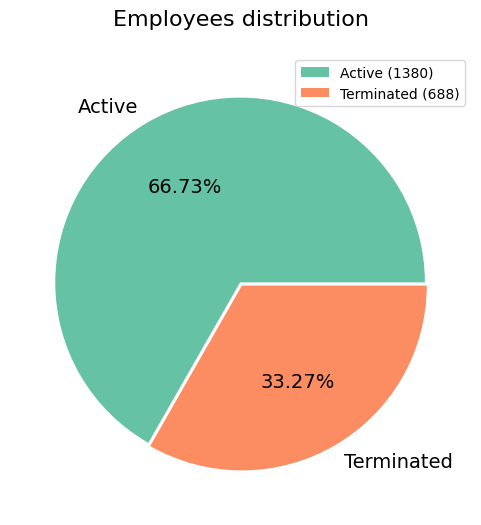

In [10]:
# Plot employees distribution
plot_pie(items=[len(active), len(terminated)], 
         labels=['Active', 'Terminated'],
         legend=[f'Active ({len(active)})', f'Terminated ({len(terminated)})'],
         title="Employees distribution")

## Termination reason distribution

Termination reason description:
* Sluttet etter eget ønske - Ended at will **(code 99)**
* Alderspensjon - Retirement pension  **(code 1)**         
* Annen sluttårsak - Other end reason               
* Dødsfall - Death                         
* Annet selskap i konsernet - Other company in the group        
* Uførepensjon - Disability pension                    
* Avskj/Oppsig. arb.t.forh. - Dismissal/Termination working hours      

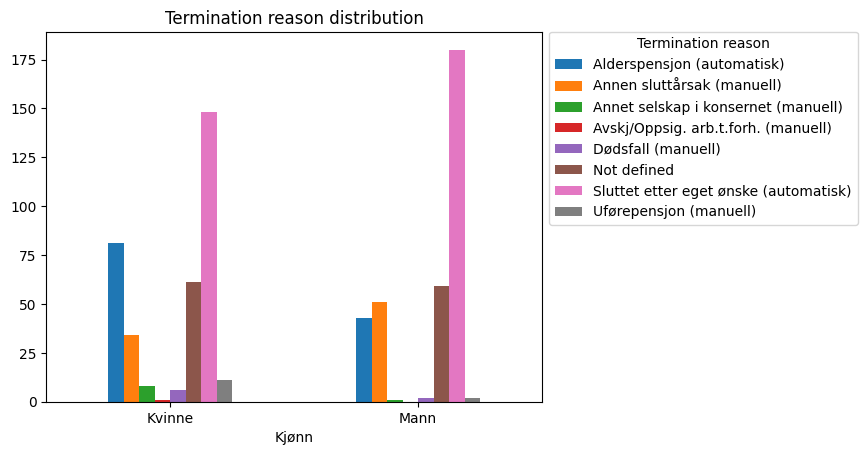

In [11]:
terminated['Sluttårsak kode navn'].fillna('Not defined', inplace=True)
crosstb = pd.crosstab(terminated.Kjønn, [terminated['Sluttårsak kode navn']])
a = crosstb.plot(kind='bar', rot=0, title='Termination reason distribution').legend(title='Termination reason', bbox_to_anchor=(1, 1.02),loc='upper left')

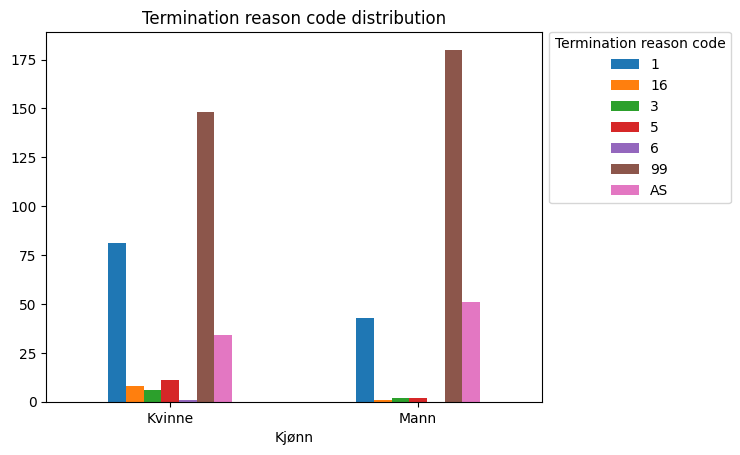

In [12]:
crosstb = pd.crosstab(terminated.Kjønn, [terminated['Sluttårsak kode']])
a = crosstb.plot(kind='bar', rot=0, title='Termination reason code distribution').legend(title='Termination reason code', bbox_to_anchor=(1, 1.02),loc='upper left')

----
### Reason for change distribution

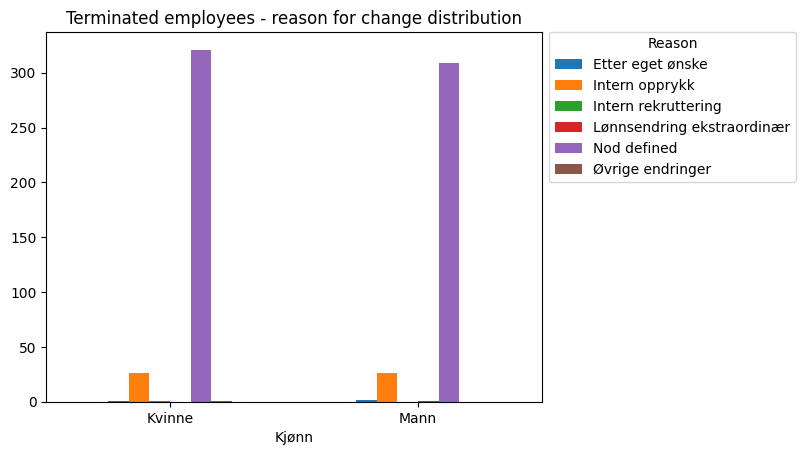

In [13]:
terminated['Årsakskode beskrivelse'].fillna('Not defined', inplace=True)
crosstb = pd.crosstab(terminated.Kjønn, [terminated['Årsakskode beskrivelse']])
a = crosstb.plot(kind='bar', rot=0, title='Terminated employees - reason for change distribution').legend(title='Reason', bbox_to_anchor=(1, 1.02),loc='upper left')

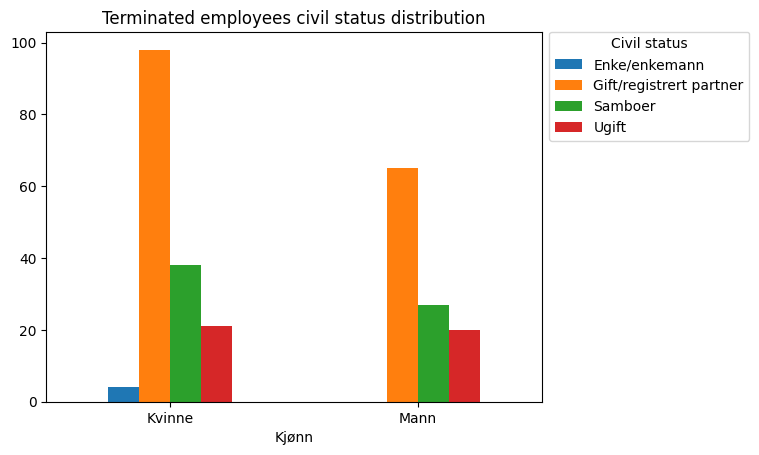

In [14]:
crosstb = pd.crosstab(terminated.Kjønn, [terminated.Sivilstatus])
a = crosstb.plot(kind='bar', rot=0, title='Terminated employees civil status distribution').legend(title='Civil status', bbox_to_anchor=(1, 1.02),loc='upper left')

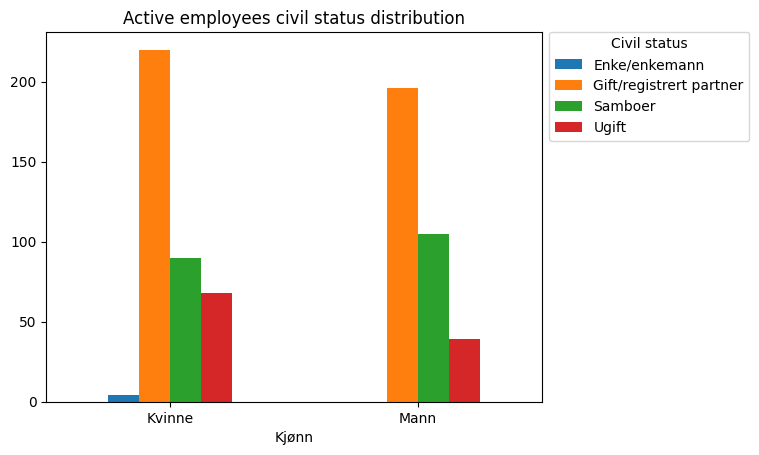

In [15]:
crosstb = pd.crosstab(active.Kjønn, [active.Sivilstatus])
a = crosstb.plot(kind='bar', rot=0, title='Active employees civil status distribution').legend(title='Civil status', bbox_to_anchor=(1, 1.02),loc='upper left')

Text(0.5, 1.0, 'Terminated employees age distribution')

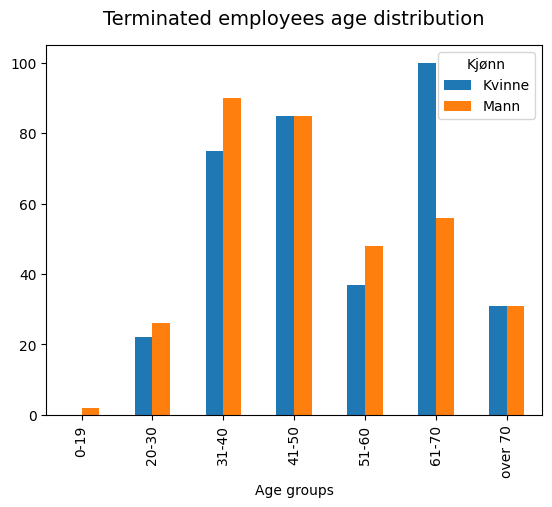

In [16]:
terminated['Age groups'] = pd.cut(terminated.Alder, bins=[0, 19, 29, 39, 49, 59, 69, 200], right=True, labels=['0-19', '20-30', '31-40', '41-50', '51-60', '61-70', 'over 70'])
myplot = pd.crosstab(terminated['Age groups'],terminated['Kjønn']).plot.bar()
myplot.set_title('Terminated employees age distribution', pad=15, fontsize=14)

Text(0.5, 1.0, 'Active employees age distribution')

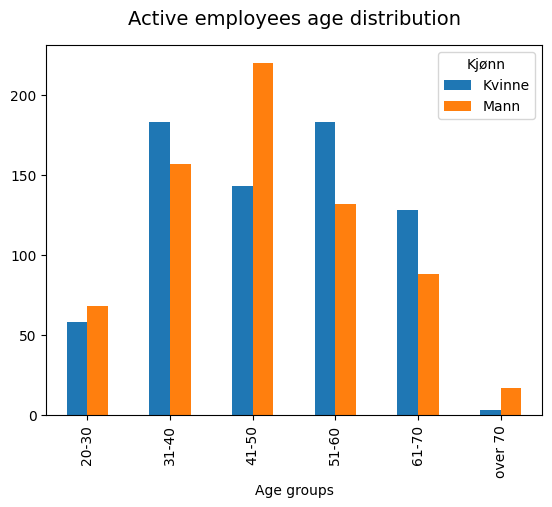

In [17]:
active['Age groups'] = pd.cut(active.Alder, bins=[0, 19, 29, 39, 49, 59, 69, 200], right=True, labels=['0-19', '20-30', '31-40', '41-50', '51-60', '61-70', 'over 70'])
myplot = pd.crosstab(active['Age groups'],active['Kjønn']).plot.bar()
myplot.set_title('Active employees age distribution', pad=15, fontsize=14)